### Practise KMeans with Mall_customers data

In [1]:
#First Practice KMeans with Mall_customers data
#Here we have cluster and find out people who we should target as customers for our mall.
#So the entire dataframe is our data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"C:\Users\Himanshu Agarwal\Desktop\Python programs\ML using Python Microsoft\Mall_Customers - Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#Let's clean our data first

In [5]:
df.set_index("CustomerID",inplace=True)

In [6]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [8]:
#As we can see, we've dealed with duplicates, ambiguity, null values.

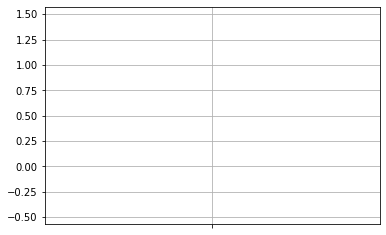

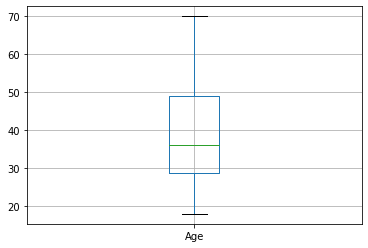

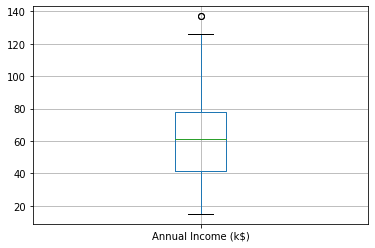

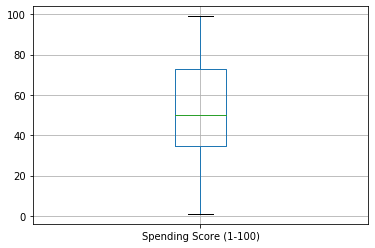

In [9]:
for i in df.columns:
    df[[i]].boxplot()
    plt.show()

In [10]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


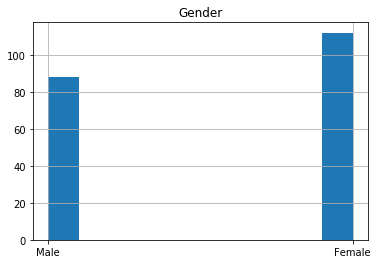

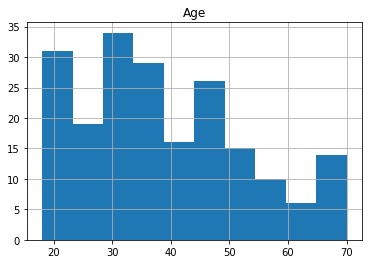

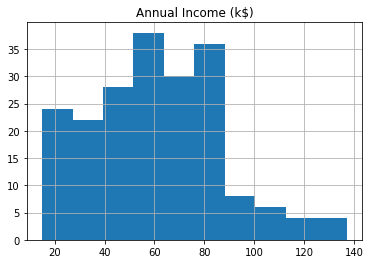

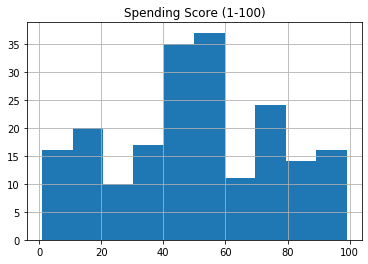

In [17]:
for i in df.columns:
    df[i].hist()
    plt.title(i)
    plt.show()
    

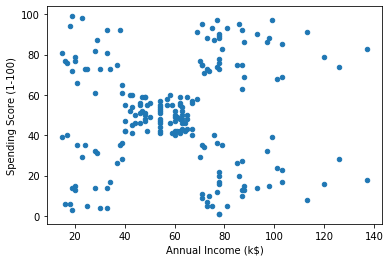

In [21]:
df.plot.scatter('Annual Income (k$)','Spending Score (1-100)')

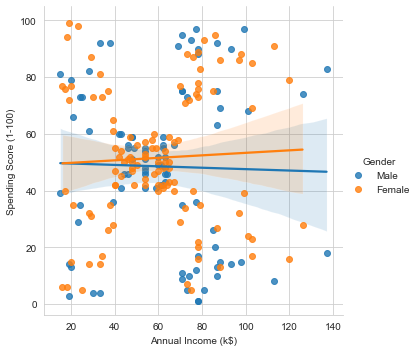

In [24]:
import seaborn as sns
sns.set_style('whitegrid')
sns.lmplot('Annual Income (k$)','Spending Score (1-100)',data=df,hue='Gender')

In [25]:
#As we can see, there are no unrealistic garbage values as well

In [26]:
#So, it seems like we've cleaned our data already

In [28]:
#As we can see from the scatterplots above, it is a general cluster(not a spiral cluster).
#We could visualize clusters above in the scatter plots
#It seems like there maybe 5 clusters(looking at the scatter plots above)
#So let's try with k=5

In [45]:
#We already know that we cannot train model over string datatype. Converting it to numeric datatype using LabelEncoder.

from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df = df.apply(lb.fit_transform)

In [35]:
from sklearn.cluster import KMeans

In [36]:
x = df.copy()

In [37]:
x.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1,1,0,30
2,1,3,0,67
3,0,2,1,4
4,0,5,1,64
5,0,13,2,31


In [38]:
kmean = KMeans(n_clusters=5,n_init=20,random_state=42)
kmean.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [39]:
kmean.labels_

array([0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 4, 0, 2, 0,
       2, 0, 4, 0, 0, 0, 4, 0, 0, 4, 4, 4, 4, 4, 0, 4, 4, 0, 4, 4, 4, 0,
       4, 4, 0, 0, 4, 4, 4, 4, 4, 0, 4, 4, 0, 4, 4, 4, 4, 4, 0, 4, 4, 0,
       0, 4, 4, 0, 4, 4, 4, 0, 4, 0, 4, 0, 0, 4, 4, 0, 4, 0, 4, 4, 4, 4,
       4, 0, 4, 0, 0, 0, 4, 4, 4, 4, 0, 4, 4, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

In [40]:
x['Clusters'] = kmean.labels_

In [41]:
x.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
CustomerID,,,,,
1,1,1,0,30,0
2,1,3,0,67,0
3,0,2,1,4,2
4,0,5,1,64,0
5,0,13,2,31,2


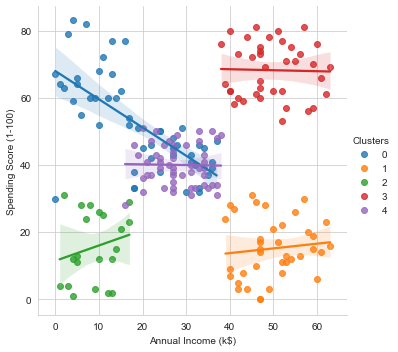

In [46]:
sns.set_style('whitegrid')
sns.lmplot('Annual Income (k$)','Spending Score (1-100)',hue='Clusters',data=x)

In [47]:
#As we can see, my 5 clusters have been plotted and segregated above.

In [48]:
#From the clusters above, we can say-

#Cluster 0(Blue) are people with extremely low income but very spending scores. These people might be in debt or indulged
#illegal activities. So, we should contact these people cautiously

#Cluster 1(orange) are people with very high income but very low spendings. So,it is useless to contact them.

#Cluster 2(Green) are people with low income and low spendings. So don't target them as well.

#Cluster 3(Red) are people with high income and high spendings as well. They must be our target customers.

#Cluster 4(Purple) are middle class segments(average income-average exenditure). So, targetting them is also of no use.

#So,from the clusters above, it was evident that targetting people in cluster 3 will be fruitful

In [49]:
x[x['Clusters'] == 3]

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
CustomerID,,,,,
124,1,21,38,76,3
126,0,13,39,64,3
128,1,22,40,80,3
130,1,20,40,62,3
132,1,21,40,62,3
134,0,13,41,58,3
136,0,11,42,73,3
138,1,14,42,60,3
140,0,17,43,59,3


In [50]:
#The most important step in KMeans clustering is choosing the number of clusters(k).
#It is not always possible that we can predict the number of clusters just by looking at the scatter plot.
#To compute the value of k, we need to plot the elbow graph (the graph of possible k-values vs variance for each of them)

In [51]:
#So, let's see how to plot the elbow graph and evaluate the correct value of k(no. of clusters).

In [53]:
x2 = x.drop('Clusters',axis=1)
x2.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1,1,0,30
2,1,3,0,67
3,0,2,1,4
4,0,5,1,64
5,0,13,2,31


In [56]:
#Let's plot elbow graph for k=1 to k=15
wcss = []
for i in range(1,16):
    kmeans = KMeans(n_clusters=i,n_init=20,random_state=42)
    kmeans.fit(x2)
    wcss.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow graph')

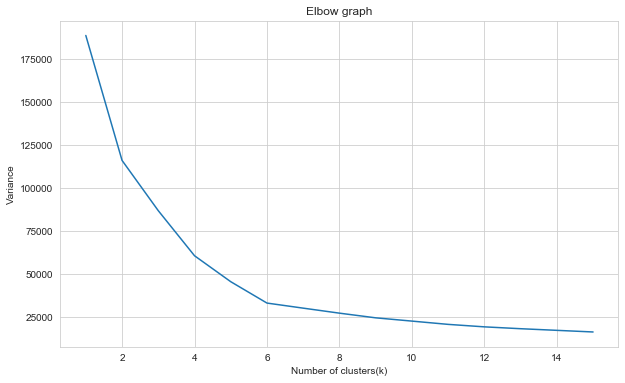

In [62]:
plt.figure(figsize=(10,6))
plt.plot(range(1,16),wcss)
plt.xlabel('Number of clusters(k)')
plt.ylabel('Variance')
plt.title('Elbow graph')

In [59]:
#Optimal value of k is from where variance starts decreasing linearly.

In [63]:
#From the plot above, we can see that our k(number of clusters) comes 6.
#So,taking 6 as correct value of number of clusters(k)

In [64]:
kmeans = KMeans(n_clusters=6,n_init=20,random_state=42)
kmeans.fit(x2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [65]:
kmeans.labels_

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1, 0, 3, 0,
       3, 0, 1, 5, 5, 5, 1, 5, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5, 1, 1, 1, 5,
       1, 1, 5, 5, 1, 1, 1, 1, 1, 5, 1, 5, 5, 1, 1, 5, 1, 1, 5, 1, 1, 5,
       5, 1, 1, 5, 1, 5, 5, 5, 1, 5, 1, 5, 5, 1, 1, 5, 1, 5, 1, 1, 1, 1,
       1, 5, 5, 5, 5, 5, 1, 1, 1, 1, 5, 5, 5, 4, 5, 4, 2, 4, 2, 4, 2, 4,
       5, 4, 2, 4, 2, 4, 2, 4, 2, 4, 5, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4])

In [67]:
x2['Clusters'] = kmeans.labels_
x2.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
CustomerID,,,,,
1,1,1,0,30,3
2,1,3,0,67,0
3,0,2,1,4,3
4,0,5,1,64,0
5,0,13,2,31,3


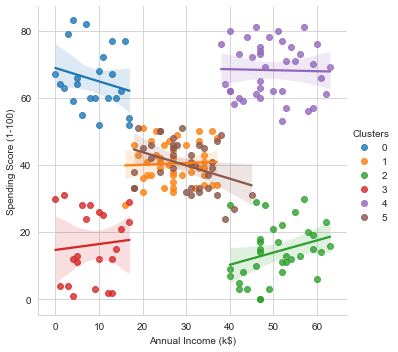

In [69]:
sns.set_style('whitegrid')
sns.lmplot('Annual Income (k$)','Spending Score (1-100)',data=x2,hue='Clusters')

In [70]:
#As we can see 4 clusters are segregated perfectly(purple,blue,red,green). But orange and brown overlap.
#So try to reduce k to 5. 
#It will work better.